In [47]:
from configparser import ConfigParser
import joblib as jl
import pathlib as pl

import numpy as np
import pandas as pd

from scipy.stats import kurtosis, skew
# from sklearn.svm import LinearSVC
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from IPython.display import Image

# from src.models.decoder import decoder
# from src.data.tensor_loaders import tensor_loaders
from src.root_path import config_path
# from src.utils.subsets import good_sites
# from src.utils.tools import shuffle_along_axis

config = ConfigParser()
config.read_file(open(config_path / 'settings.ini'))


In [57]:
summary_DF_file = pl.Path(config['paths']['analysis_cache']) / '220520_minimal_DF'
# Cluster Mass significant contextual effects
# summary_DF_file = pl.Path(config['paths']['analysis_cache']) / f'220804_significant_abs_deltaFR_DF'

metrics = ['integral', 'last_bin']
DF = jl.load(summary_DF_file).query(f"source == 'real' and metric in {metrics} and "
                                    f"cluster_threshold == 0.05 and mult_comp_corr == 'bf_cp' and "
                                    f"analysis == 'SC' and source == 'real' and "
                                    f"diff_metric == 'delta_FR' and "
                                    f"value > 0")

DF.loc[DF.metric == 'integral', 'value'] = DF.loc[DF.metric == 'integral', 'value'] /1000  # ms to s for better display
DF.drop(columns=['source', 'cluster_threshold', 'mult_comp_corr',
                 'analysis', 'stim_count',], inplace=True)

DF['instance'] = pd.Categorical(DF.context_pair.str.cat(DF.probe.map(str), sep = "_"))

DF.reset_index(drop=True, inplace=True)

(91812, 9)
              id context_pair probe     value    metric diff_metric     site  \
0  TNC013a-019-3        00_01     1  0.181284  integral    delta_FR  TNC013a   
1  TNC013a-036-3        00_01     1  0.337167  integral    delta_FR  TNC013a   
2  TNC013a-042-9        00_01     1  0.192177  integral    delta_FR  TNC013a   
3  TNC013a-046-1        00_01     1  0.134207  integral    delta_FR  TNC013a   
4  TNC013a-036-3        00_02     1  0.346280  integral    delta_FR  TNC013a   

  region instance  
0     A1  00_01_1  
1     A1  00_01_1  
2     A1  00_01_1  
3     A1  00_01_1  
4     A1  00_02_1  


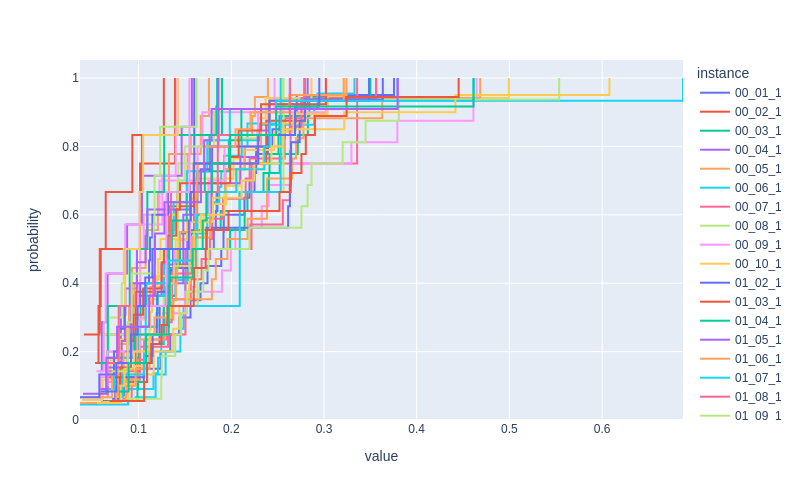

In [77]:
df = DF.query("site == 'TNC022a' and metric == 'integral' "
              "and probe == 1").copy()
df['instance'] = df.context_pair.str.cat(df.probe.map(str), sep = "_")

fig = px.ecdf(df, x='value', color='instance',
              # barmode='overlay'
              )

img_bytes = fig.to_image(format="png", width=800, height=500)
Image(img_bytes)

/home/mateo/miniconda3/envs/context_probe_analysis/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning:

invalid value encountered in true_divide



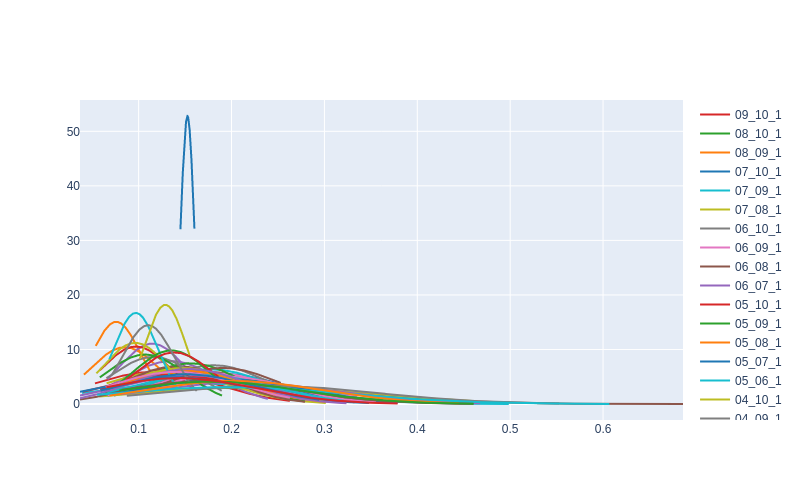

In [78]:
wide = df.pivot(index='id', columns='instance', values='value')
fig = ff.create_distplot([wide[c].dropna() for c in wide.columns], wide.columns,
                         curve_type = 'normal', show_rug=False, show_hist=False)
img_bytes = fig.to_image(format="png", width=800, height=500)
Image(img_bytes)

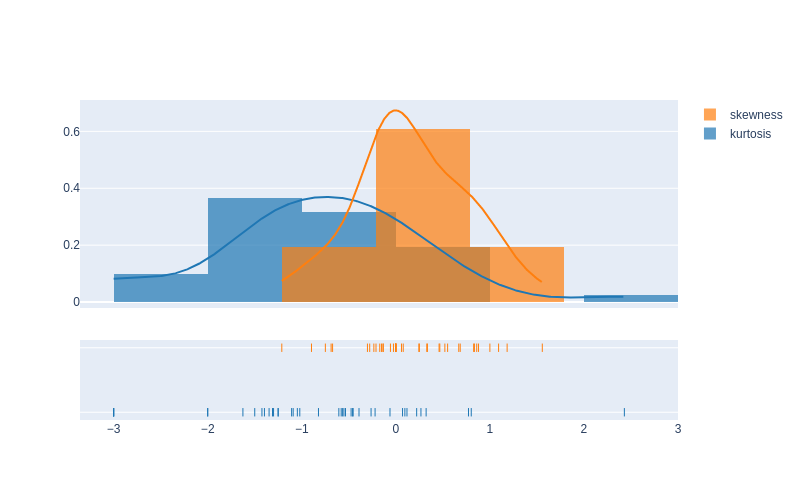

In [79]:
kurt = kurtosis(wide.values, axis=1, nan_policy='omit')
skw = skew(wide.values, axis=1, nan_policy='omit')
fig = ff.create_distplot([kurt, skw], ['kurtosis', 'skewness'])

img_bytes = fig.to_image(format="png", width=800, height=500)
Image(img_bytes)

In [81]:
WIDE = DF.query("metric=='integral'").pivot_table(
    index=['site', 'id'], columns='instance', values='value', aggfunc='first', observed=True)

In [108]:
all_kurt = list()
site_names = list()
for site in WIDE.index.get_level_values('site').categories:

    kurt = kurtosis(WIDE.loc[site,:].values, axis=0, nan_policy='omit').data
    print(kurt.shape)
    all_kurt.append(kurt)
    site_names.append(site)


(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)
(550,)


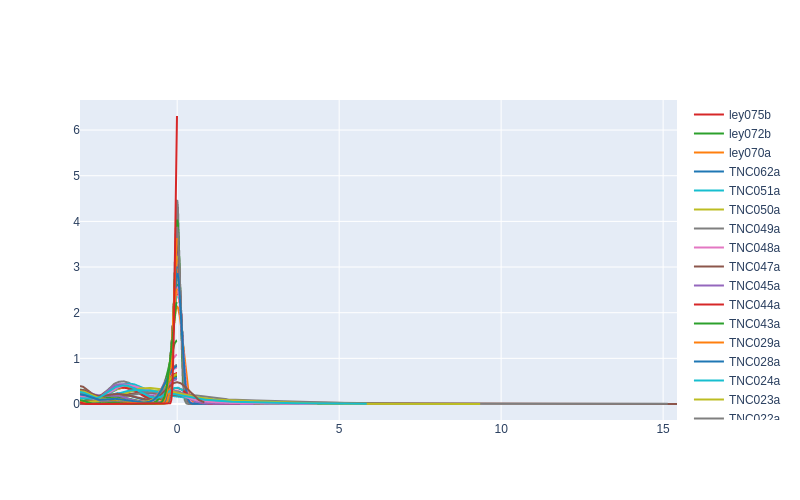

In [112]:
fig = ff.create_distplot(all_kurt, site_names,
                         show_rug=False, show_hist=False)
img_bytes = fig.to_image(format="png", width=800, height=500)
Image(img_bytes)